<a href="https://colab.research.google.com/github/edenbrln/Programs/blob/main/Sales_Analysis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sales_6.csv to sales_6.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

sales_data = pd.read_csv('sales_6.csv')
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [4]:
sales_data['date'] = sales_data['Time_stamp'].str[:7]
sales_data.head()

sales_data['date'].value_counts()

,count
date,
2022-03,50465
2022-02,49380


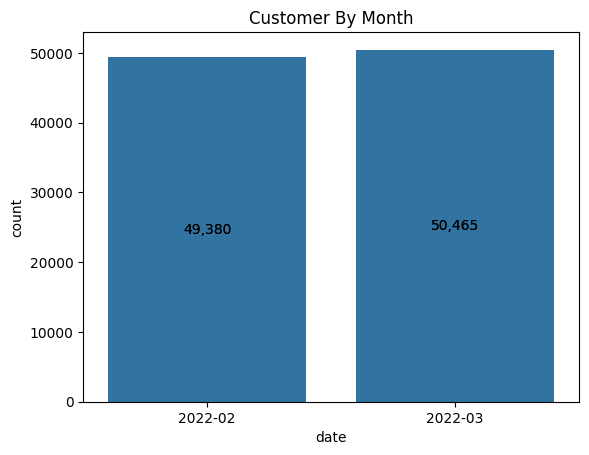

In [5]:
ax = sns.countplot(data=sales_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Month')

plt.show()

In [6]:
grouped = sales_data['Status'].groupby([sales_data['date'], sales_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Status, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


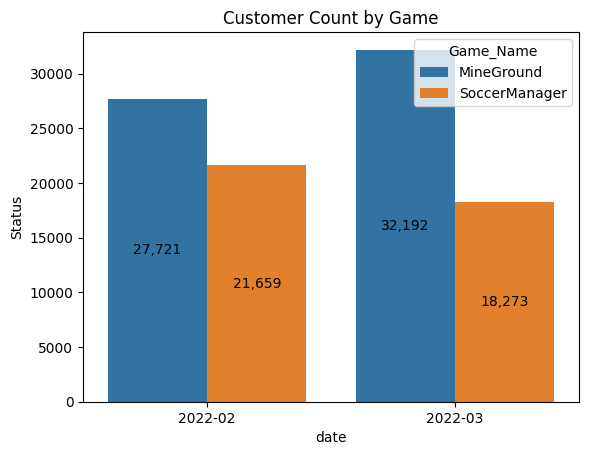

In [7]:
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Status', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Count by Game')
plt.show()

In [8]:
sales_data['Status'].value_counts()

,count
Status,
play,84821
install,15024


In [10]:
# Monthly payment counts
temp_data = sales_data[sales_data['Payment'] !=0]
temp_data['date'].value_counts()

,count
date,
2022-02,8542
2022-03,6898


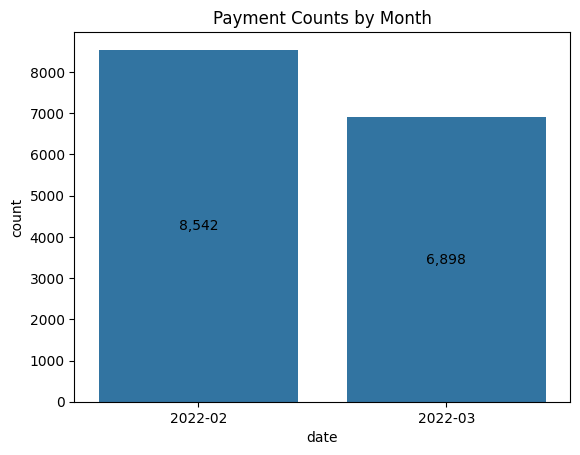

In [11]:
# Monthly payments visualization
ax = sns.countplot(data=temp_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Counts by Month')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


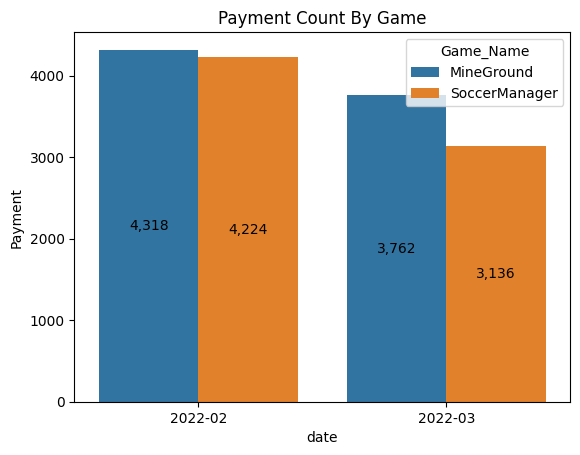

In [13]:
# Payment counts by games

grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).count()
grouped

ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

In [14]:
player_data = sales_data[sales_data['Status'] == 'play']
player_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


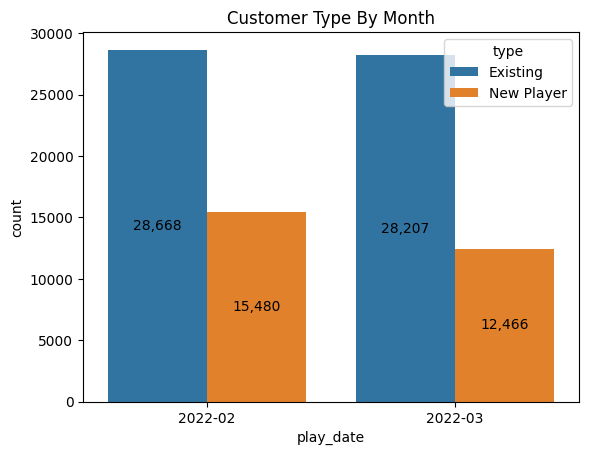

In [21]:
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()

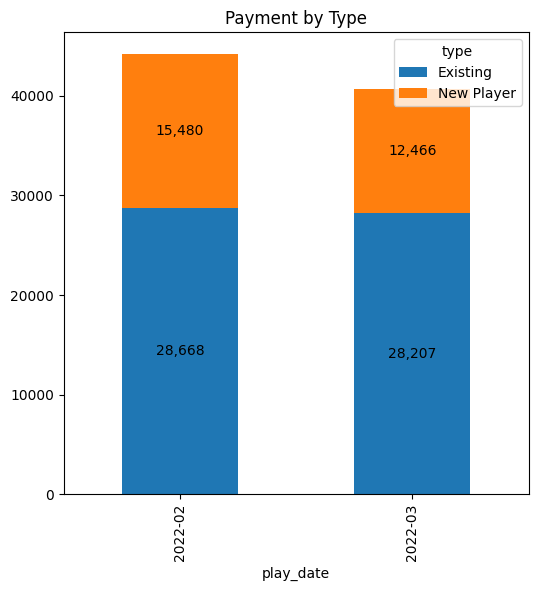

In [22]:
ax = grouped.unstack().plot(kind='bar', stacked=True, grid=False, figsize=[6,6])

containers = ax.containers[-1]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-2]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('Payment by Type')
plt.show()

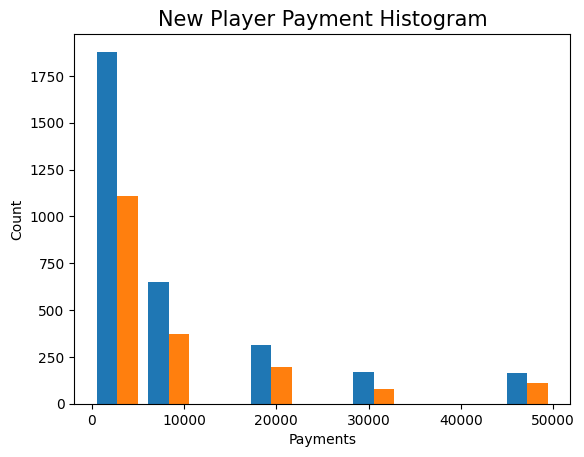

In [24]:
payment_data = player_data.set_index('type', drop=True)
payment_data

payment_data.drop('Existing', inplace=True)

payment_data = payment_data.set_index('Payment')

payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()

payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

total_payment = np.array([payment_data_02, payment_data_03],dtype=object,)


bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()